# Data analysis - Trip Advisor Restaurant data
1. sumber dataset: https://www.kaggle.com/datasets/siddharthmandgi/tripadvisor-restaurant-recommendation-data-usa/discussion/332697
2. project ini bertujuan untuk memperoleh wawasan dari data tersebut, serta memberikan kesimpulan dan rekomendasi sebagai data analyst

# Data Cleansing

In [2]:
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("TripAdvisor_RestauarantRecommendation.csv")
data.head()

,Name,Street Address,Location,Type,Reviews,No of Reviews,Comments,Contact Number,Trip_advisor Url,Menu,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,NaN,+1 415-757-0569,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,"Both times we were there very late, after 11 P...",+1 201-488-4999,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,Waitress was very friendly but a little pricey...,+1 845-849-2839,https://www.tripadvisor.com//Restaurant_Review...,http://tabletalkdiner.com/menu/breakfast/,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777","American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,Not sure why I went there for the second time....,+1 469-620-8463,https://www.tripadvisor.com//Restaurant_Review...,https://sixtyvines.com/menu/plano-tx/,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews,Doesn't look like much from the outside but wa...,+1 315-458-1662,https://www.tripadvisor.com//Restaurant_Review...,Check The Website for a Menu,$$ - $$$


In [4]:
#drop columns
data.drop(['Comments','Contact Number','Trip_advisor Url','Menu'],axis=1, inplace=True)

In [5]:
data.isnull().sum()

Name               0
Street Address     0
Location           0
Type              13
Reviews            0
No of Reviews      0
Price_Range        0
dtype: int64

In [6]:
#nilai null akan di drop karena kolom tipe akan digunakan untuk analisis
#dropna
data.dropna(axis=0,inplace=True)

In [7]:
data.reset_index(drop=True)

,Name,Street Address,Location,Type,Reviews,No of Reviews,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"San Francisco, CA 94133-3908","Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,$$ - $$$
1,Coach House Diner,55 State Rt 4,"Hackensack, NJ 07601-6337","Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"Poughkeepsie, NY 12601-5476","American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"Plano, TX 75093-7777","American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"Syracuse, NY 13212","American, Bar, Seafood",4 of 5 bubbles,285 reviews,$$ - $$$
...,...,...,...,...,...,...,...
3044,Indigo Kitchen & Ale House,2902 164th St SW,"Lynnwood, WA 98087-3201","American, Bar, Vegetarian Friendly",4.5 of 5 bubbles,198 reviews,$$ - $$$
3045,City Vineyard,233 West Street,"New York City, NY 10013","American, Bar, Seafood",4.5 of 5 bubbles,374 reviews,$$ - $$$
3046,BRIO Tuscan Grille,3710 US Highway 9,"Freehold, NJ 07728-4801","Steakhouse, Italian, Bar",4 of 5 bubbles,211 reviews,$$ - $$$
3047,Maywood Pancake house,92 W Pleasant Ave,"Maywood, NJ 07607-1336","American, Vegan Options, Gluten Free Options",4 of 5 bubbles,87 reviews,$$ - $$$


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3049 entries, 0 to 3061
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            3049 non-null   object
 1   Street Address  3049 non-null   object
 2   Location        3049 non-null   object
 3   Type            3049 non-null   object
 4   Reviews         3049 non-null   object
 5   No of Reviews   3049 non-null   object
 6   Price_Range     3049 non-null   object
dtypes: object(7)
memory usage: 190.6+ KB


In [9]:
#Membagi kolom location menjadi 3 kolom agar bisa dianalisis sesuai kota, dan ibukota
data[['City','kota']]=data['Location'].str.split(", ",1,expand=True)
data[['state','zip_code']]=data['kota'].str.split(" ",1,expand=True)
data.drop(columns=['Location','kota'],inplace=True)
data

C:\Users\zibran\AppData\Local\Temp\ipykernel_9256\907763260.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['City','kota']]=data['Location'].str.split(", ",1,expand=True)
C:\Users\zibran\AppData\Local\Temp\ipykernel_9256\907763260.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['state','zip_code']]=data['kota'].str.split(" ",1,expand=True)


,Name,Street Address,Type,Reviews,No of Reviews,Price_Range,City,state,zip_code
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"Seafood, Vegetarian Friendly, Vegan Options",4.5 of 5 bubbles,243 reviews,$$ - $$$,San Francisco,CA,94133-3908
1,Coach House Diner,55 State Rt 4,"Diner, American, Vegetarian Friendly",4 of 5 bubbles,84 reviews,$$ - $$$,Hackensack,NJ,07601-6337
2,Table Talk Diner,2521 South Rd Ste C,"American, Diner, Vegetarian Friendly",4 of 5 bubbles,256 reviews,$$ - $$$,Poughkeepsie,NY,12601-5476
3,Sixty Vines,3701 Dallas Pkwy,"American, Wine Bar, Vegetarian Friendly",4.5 of 5 bubbles,235 reviews,$$ - $$$,Plano,TX,75093-7777
4,The Clam Bar,3914 Brewerton Rd,"American, Bar, Seafood",4 of 5 bubbles,285 reviews,$$ - $$$,Syracuse,NY,13212
...,...,...,...,...,...,...,...,...,...
3057,Indigo Kitchen & Ale House,2902 164th St SW,"American, Bar, Vegetarian Friendly",4.5 of 5 bubbles,198 reviews,$$ - $$$,Lynnwood,WA,98087-3201
3058,City Vineyard,233 West Street,"American, Bar, Seafood",4.5 of 5 bubbles,374 reviews,$$ - $$$,New York City,NY,10013
3059,BRIO Tuscan Grille,3710 US Highway 9,"Steakhouse, Italian, Bar",4 of 5 bubbles,211 reviews,$$ - $$$,Freehold,NJ,07728-4801
3060,Maywood Pancake house,92 W Pleasant Ave,"American, Vegan Options, Gluten Free Options",4 of 5 bubbles,87 reviews,$$ - $$$,Maywood,NJ,07607-1336


In [10]:
#memindahkan kolom ke tengah
data.insert(3,'City',data.pop('City'))
data.insert(4,'state',data.pop('state'))
data.insert(5,'zip_zode',data.pop('zip_code'))

In [11]:
data['Price_Range'].value_counts()

$$ - $$$    2383
$$$$         384
$            281
American       1
Name: Price_Range, dtype: int64

In [12]:
#Terdapat 'american' di kolom price_range maka nilai tersebut akan dimasukkan  sesuai harga tipenya 
#mencari nilai American
con_american=data[data['Type'].str.contains('American')]
con_american

,Name,Street Address,Type,City,state,zip_zode,Reviews,No of Reviews,Price_Range
1,Coach House Diner,55 State Rt 4,"Diner, American, Vegetarian Friendly",Hackensack,NJ,07601-6337,4 of 5 bubbles,84 reviews,$$ - $$$
2,Table Talk Diner,2521 South Rd Ste C,"American, Diner, Vegetarian Friendly",Poughkeepsie,NY,12601-5476,4 of 5 bubbles,256 reviews,$$ - $$$
3,Sixty Vines,3701 Dallas Pkwy,"American, Wine Bar, Vegetarian Friendly",Plano,TX,75093-7777,4.5 of 5 bubbles,235 reviews,$$ - $$$
4,The Clam Bar,3914 Brewerton Rd,"American, Bar, Seafood",Syracuse,NY,13212,4 of 5 bubbles,285 reviews,$$ - $$$
6,Black Angus Steakhouse - Federal Way,2400 S 320th St,"American, Steakhouse, Bar",Federal Way,WA,98003-5465,4 of 5 bubbles,220 reviews,$$ - $$$
...,...,...,...,...,...,...,...,...,...
3052,Uncle Bill's Pancake House,2112 Asbury Ave,"American, Vegetarian Friendly",Ocean City,NJ,08226-2727,4 of 5 bubbles,265 reviews,$$ - $$$
3054,Crave Fishbar,945 2nd Ave,"Seafood, American, International",New York City,NY,10022-7761,4.5 of 5 bubbles,424 reviews,$$ - $$$
3057,Indigo Kitchen & Ale House,2902 164th St SW,"American, Bar, Vegetarian Friendly",Lynnwood,WA,98087-3201,4.5 of 5 bubbles,198 reviews,$$ - $$$
3058,City Vineyard,233 West Street,"American, Bar, Seafood",New York City,NY,10013,4.5 of 5 bubbles,374 reviews,$$ - $$$


In [13]:
data['Price_Range']=data['Price_Range'].replace('American','$')

In [14]:
data['Price_Range'].value_counts()

$$ - $$$    2383
$$$$         384
$            282
Name: Price_Range, dtype: int64

In [15]:
data['Price_Range']=data['Price_Range'].replace('$$ - $$$','Moderate')
data['Price_Range']=data['Price_Range'].replace('$$$$','Expensive')
data['Price_Range']=data['Price_Range'].replace('$','Cheap')

In [16]:
data['Price_Range'].value_counts()

Moderate     2383
Expensive     384
Cheap         282
Name: Price_Range, dtype: int64

In [17]:
#Mengubah tipe kolom reviews dan No of Reviews menjadi integer
data['Reviews']=[float(text.split()[0]) for text in data['Reviews']]

In [18]:
data['No of Reviews']=data['No of Reviews'].str.replace('reviews','')
data

,Name,Street Address,Type,City,state,zip_zode,Reviews,No of Reviews,Price_Range
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"Seafood, Vegetarian Friendly, Vegan Options",San Francisco,CA,94133-3908,4.5,243,Moderate
1,Coach House Diner,55 State Rt 4,"Diner, American, Vegetarian Friendly",Hackensack,NJ,07601-6337,4.0,84,Moderate
2,Table Talk Diner,2521 South Rd Ste C,"American, Diner, Vegetarian Friendly",Poughkeepsie,NY,12601-5476,4.0,256,Moderate
3,Sixty Vines,3701 Dallas Pkwy,"American, Wine Bar, Vegetarian Friendly",Plano,TX,75093-7777,4.5,235,Moderate
4,The Clam Bar,3914 Brewerton Rd,"American, Bar, Seafood",Syracuse,NY,13212,4.0,285,Moderate
...,...,...,...,...,...,...,...,...,...
3057,Indigo Kitchen & Ale House,2902 164th St SW,"American, Bar, Vegetarian Friendly",Lynnwood,WA,98087-3201,4.5,198,Moderate
3058,City Vineyard,233 West Street,"American, Bar, Seafood",New York City,NY,10013,4.5,374,Moderate
3059,BRIO Tuscan Grille,3710 US Highway 9,"Steakhouse, Italian, Bar",Freehold,NJ,07728-4801,4.0,211,Moderate
3060,Maywood Pancake house,92 W Pleasant Ave,"American, Vegan Options, Gluten Free Options",Maywood,NJ,07607-1336,4.0,87,Moderate


In [19]:
data[['Cuisine','Type_2']]=data['Type'].str.split(',',1,expand=True)

C:\Users\zibran\AppData\Local\Temp\ipykernel_9256\3818643998.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data[['Cuisine','Type_2']]=data['Type'].str.split(',',1,expand=True)


In [20]:
data.drop('Type_2',axis=1,inplace=True)

In [21]:
data

,Name,Street Address,Type,City,state,zip_zode,Reviews,No of Reviews,Price_Range,Cuisine
0,Betty Lou's Seafood and Grill,318 Columbus Ave,"Seafood, Vegetarian Friendly, Vegan Options",San Francisco,CA,94133-3908,4.5,243,Moderate,Seafood
1,Coach House Diner,55 State Rt 4,"Diner, American, Vegetarian Friendly",Hackensack,NJ,07601-6337,4.0,84,Moderate,Diner
2,Table Talk Diner,2521 South Rd Ste C,"American, Diner, Vegetarian Friendly",Poughkeepsie,NY,12601-5476,4.0,256,Moderate,American
3,Sixty Vines,3701 Dallas Pkwy,"American, Wine Bar, Vegetarian Friendly",Plano,TX,75093-7777,4.5,235,Moderate,American
4,The Clam Bar,3914 Brewerton Rd,"American, Bar, Seafood",Syracuse,NY,13212,4.0,285,Moderate,American
...,...,...,...,...,...,...,...,...,...,...
3057,Indigo Kitchen & Ale House,2902 164th St SW,"American, Bar, Vegetarian Friendly",Lynnwood,WA,98087-3201,4.5,198,Moderate,American
3058,City Vineyard,233 West Street,"American, Bar, Seafood",New York City,NY,10013,4.5,374,Moderate,American
3059,BRIO Tuscan Grille,3710 US Highway 9,"Steakhouse, Italian, Bar",Freehold,NJ,07728-4801,4.0,211,Moderate,Steakhouse
3060,Maywood Pancake house,92 W Pleasant Ave,"American, Vegan Options, Gluten Free Options",Maywood,NJ,07607-1336,4.0,87,Moderate,American


In [22]:
data['No of Reviews']=data['No of Reviews'].str.strip().str.replace(",","").astype(int)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3049 entries, 0 to 3061
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            3049 non-null   object 
 1   Street Address  3049 non-null   object 
 2   Type            3049 non-null   object 
 3   City            3049 non-null   object 
 4   state           3049 non-null   object 
 5   zip_zode        3025 non-null   object 
 6   Reviews         3049 non-null   float64
 7   No of Reviews   3049 non-null   int32  
 8   Price_Range     3049 non-null   object 
 9   Cuisine         3049 non-null   object 
dtypes: float64(1), int32(1), object(8)
memory usage: 250.1+ KB


# EDA

# 1. Korelasi Pearson
Koefisien korelasi Pearson adalah ukuran korelasi linier antara dua variabel. Nilainya berkisar antara -1 sampai 1, di mana nilai 1 menunjukkan korelasi positif yang sempurna, nilai 0 menunjukkan tidak ada korelasi, dan nilai -1 menunjukkan korelasi negatif yang sempurna.

In [24]:
correlation = data['Reviews'].corr(data['No of Reviews'])
print(f'Korelasi Pearson: {correlation:.2f}')

Korelasi Pearson: 0.08


C:\Users\zibran\AppData\Local\Temp\ipykernel_10356\1756034394.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=data.corr()


<Axes: >

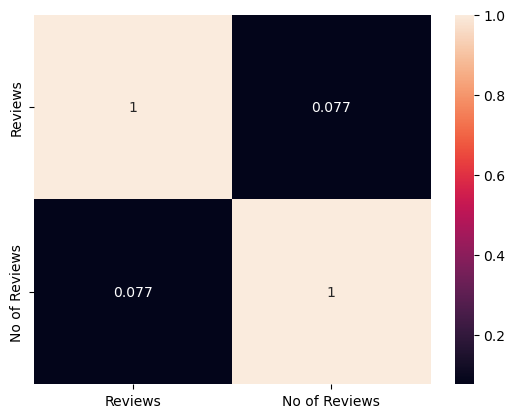

In [26]:
corr_mat=data.corr()
sns.heatmap(corr_mat, annot=True)

# insight:
berdasarkan korelasi pearson antara Reviews dan no of reviews adalah berkorelasi rendah.

# 2. Distribution Cuisine in Each State

In [25]:
type_food=data['Cuisine'].value_counts(normalize=True)
food_5=type_food.head()

In [26]:
prop_data=data[data['Cuisine'].isin(food_5.index)].groupby('state')['Cuisine'].value_counts(normalize=True).unstack().fillna(0)

<Figure size 1200x800 with 0 Axes>

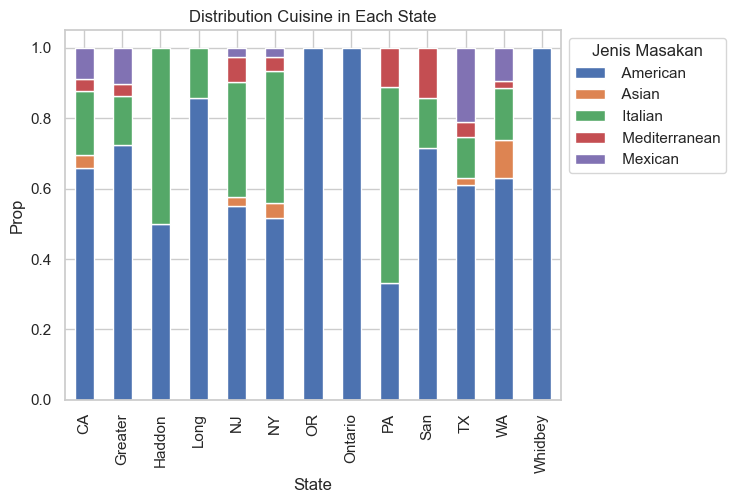

In [27]:
sns.set(style="whitegrid") 

plt.figure(figsize=(12, 8))  
prop_data.plot(kind='bar',stacked=True)

plt.title('Distribution Cuisine in Each State')
plt.xlabel('State')
plt.ylabel('Prop')
plt.legend(title='Jenis Masakan',bbox_to_anchor=(1,1), loc='upper left')

plt.show()

# Insight:
Dari setiap negara bagian masakan terpopuler adalah American diikuti Italian

# 3. Distribution of Ratings to Prices in Restaurants

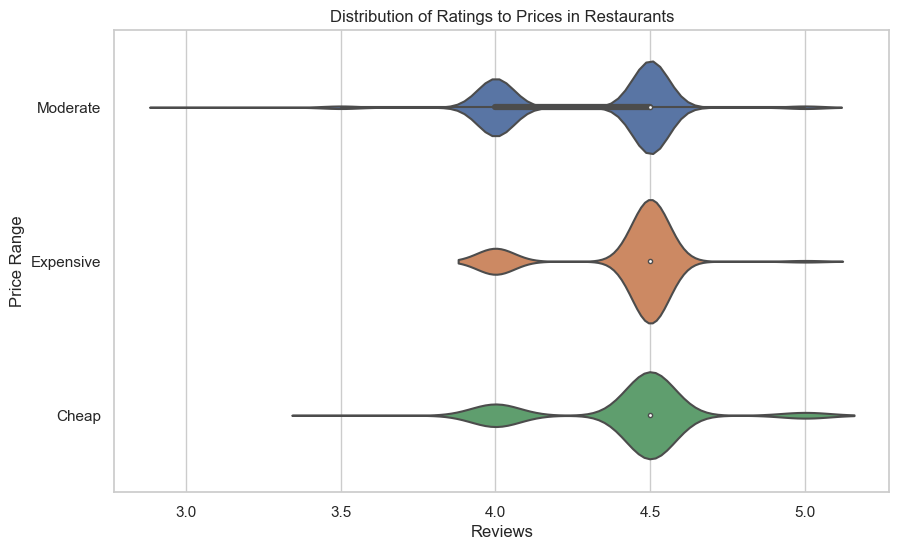

In [28]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Reviews', y='Price_Range', data=data)
plt.title('Distribution of Ratings to Prices in Restaurants')
plt.xlabel('Reviews')
plt.ylabel('Price Range')
plt.show()

# insgiht:
Restaurant yang memilki ratings 4.5 adalah yang paling umum di antara rentang harga dan restaurant yang memiliki rating 5.0 terbanyak justru dari harga murah 

# 4. The most number of restaurant by city

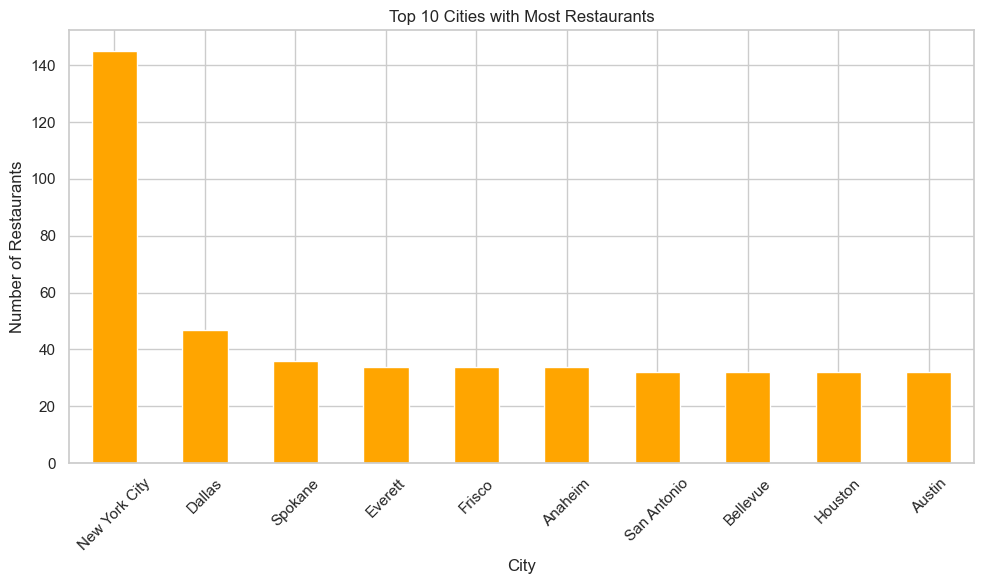

In [29]:
top_cities = data['City'].value_counts()[:10]

plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='orange')
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# insight:
dari semua kota, New York City ialah kota yang memiliki restaurant terbanyak pada dataset ini

# 5.state by number of restaurant

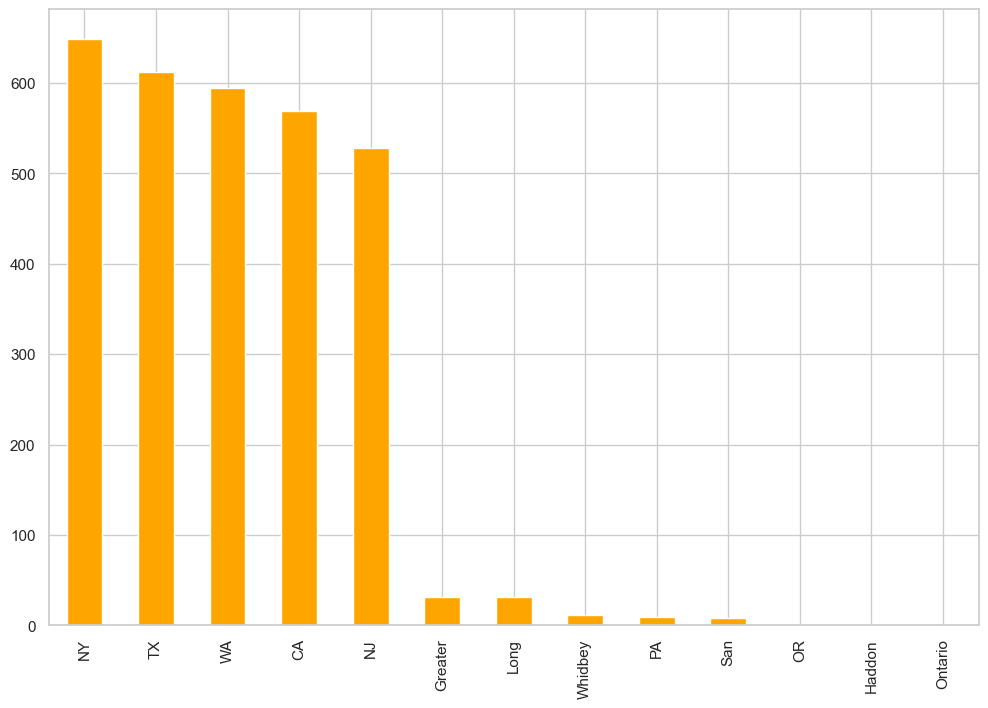

In [30]:
data['state'].value_counts().plot(kind='bar',figsize=(12,8),color='orange')
plt.show()

In [31]:
data['state'].value_counts()

NY         649
TX         612
WA         595
CA         569
NJ         528
Greater     32
Long        31
Whidbey     11
PA           9
San          8
OR           2
Haddon       2
Ontario      1
Name: state, dtype: int64

# insight:
jumlah restaurant terbanyak ialah Newyork dan
jumlah restaurant terendah ialah Ontario

# Kesimpulan
1. Review dan jumlah review memiliki korelasi yang rendah, menunjukkan bahwa keduanya tidak terkait erat.
2. Masakan American menjadi pilihan favorit di setiap negara bagian, diikuti dengan dekat oleh cita rasa menggugah dari Italia.
3. Restoran dengan rating 4,5 mendominasi kisaran harga, sedangkan restoran dengan rating 5,0 sebagian besar merupakan restoran murah
4. Newyork masih paling banyak restaurant berdasarkan kota dan negara bagian
5. Ontario adalah negara bagian yang memiliki restaurant paling sedikit

# Rekomendasi
1. Tawarkan hidangan makanan Amerika dan Italia yang mencerminkan citarasa khas keduanya.
2. Fokus pada perbaikan dan promosi restoran dengan rating 4.5, mengingat popularitasnya di berbagai rentang harga.
3. Tingkatkan ekspansi, promosi, dan pengembangan bisnis di New York.
4. Potensi Pertumbuhan di Ontario: Pertimbangkan strategi spesifik untuk menarik pasar Ontario.
5. Berdasarkan hasil korelasi, prioritaskan faktor lainnya seperti makanan, layanan, dan inovasi menu untuk meningkatkan rating dan popularitas restoran.

In [32]:
data.to_csv("Analisis_advisor.csv",index=False)